In [67]:
from viewser import Queryset, Column
from functools import partial
from viewser.operations import fetch
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import pandas as pd
from matplotlib import pyplot as plt
import views_runs

In [76]:
data = fetch("fatalities_paper")
data.head()

INFO:viewser.operations:Queryset "fatalities_paper" is being compiled... (0 retries)
INFO:viewser.operations:Queryset "fatalities_paper" is being compiled... (1 retries)
INFO:viewser.operations:Queryset "fatalities_paper" is being compiled... (2 retries)


ged_fatalities  ged_fatalities_lagged_1  \
month_id country_id                                            
1        40                     0.0                      0.0   
         41                     0.0                      0.0   
         42                     0.0                      0.0   
         43                     0.0                      0.0   
         47                     0.0                      0.0   

                     ged_fatalities_lagged_2  
month_id country_id                           
1        40                              0.0  
         41                              0.0  
         42                              0.0  
         43                              0.0  
         47                              0.0

In [68]:
data_partitioner =  views_runs.DataPartitioner({"A":{"train":(1,399),"test":(400,450)}})
models = views_runs.StepshiftedModels(SVR(),[1,2,3,4],"ged_sum")
run = views_runs.ViewsRun(data_partitioner,models)

In [69]:
run.fit("A","train",data)

In [70]:
predictions = run.predict("A","test",data)
predictions

ged_sum  ged_sum_tlag_1  step_pred_1  step_pred_2  \
month_id country_id                                                      
400      40              0.0             0.0     0.099467     0.099956   
         41              0.0             0.0     0.099467     0.099956   
         42              0.0             0.0     0.099467     0.099956   
         43              0.0             0.0     0.099467     0.099956   
         47              0.0             0.0     0.099467     0.099956   
...                      ...             ...          ...          ...   
450      242             0.0             0.0     0.099467     0.099956   
         243             0.0             0.0     0.099467     0.099956   
         244             0.0             0.0     0.099467     0.099956   
         245            10.0            31.0     6.133580     0.099956   
         246            30.0            75.0     6.809693     0.099956   

                     step_pred_3  step_pred_4  
month_id country_id                            
400      40             0.099887     0.100378  
         41             0.099887     0.100378  
         42             0.099887     0.100378  
         43             0.099887     0.100378  
         47             0.099887     0.100378  
...                          ...          ...  
450      242            0.099887     0.100378  
         243            0.099887     0.100378  
         244            0.099887     0.100378  
         245            0.099887     0.993295  
         246            0.099887     2.755230  

[3366 rows x 6 columns]

In [71]:

r2_score_ged = partial(r2_score,predictions["ged_sum"])

step_variables = [f"step_pred_{i}" for i in range(1,5)]

score_data = pd.DataFrame({"name":step_variables})
score_data["r2"] = [r2_score_ged(predictions[v]) for v in step_variables]

print(score_data)


          name        r2
0  step_pred_1 -0.006194
1  step_pred_2 -0.015726
2  step_pred_3 -0.014874
3  step_pred_4 -0.016166


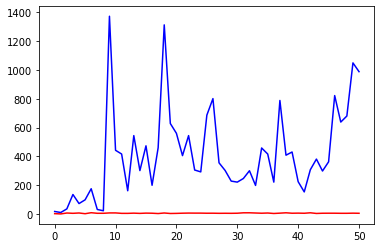

In [72]:
c220 = predictions.query("country_id == 220")
plt.plot(c220["ged_sum"].values,color = "blue")
plt.plot(c220["step_pred_1"].values, color = "red")
